In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")


In [2]:
data_path = "../data/raw/sales_data.csv"
df = pd.read_csv(data_path)

# Convert date column
df['order_date'] = pd.to_datetime(df['order_date'])

df.head()


,order_id,order_date,customer_id,product_id,product_name,category,quantity,price,total_amount,region
0,1001,2024-01-05,C001,P001,Laptop Pro,Electronics,1,1200,1200,North
1,1002,2024-01-08,C002,P002,Smartphone X,Electronics,2,800,1600,South
2,1003,2024-02-14,C003,P003,T-Shirt,Clothing,3,25,75,East
3,1004,2024-02-20,C001,P004,Headphones,Electronics,1,150,150,North
4,1005,2024-03-10,C004,P005,Cooking Set,Home,1,200,200,West


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      8 non-null      int64         
 1   order_date    8 non-null      datetime64[ns]
 2   customer_id   8 non-null      object        
 3   product_id    8 non-null      object        
 4   product_name  8 non-null      object        
 5   category      8 non-null      object        
 6   quantity      8 non-null      int64         
 7   price         8 non-null      int64         
 8   total_amount  8 non-null      int64         
 9   region        8 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 768.0+ bytes


In [4]:
df.describe()


,order_id,order_date,quantity,price,total_amount
count,8.00000,8,8.000000,8.000000,8.000000
mean,1004.50000,2024-02-26 00:00:00,2.000000,350.625000,476.875000
min,1001.00000,2024-01-05 00:00:00,1.000000,10.000000,50.000000
25%,1002.75000,2024-02-04 18:00:00,1.000000,96.250000,131.250000
50%,1004.50000,2024-02-29 12:00:00,1.500000,175.000000,220.000000
75%,1006.25000,2024-03-19 12:00:00,2.250000,425.000000,525.000000
max,1008.00000,2024-04-18 00:00:00,5.000000,1200.000000,1600.000000
std,2.44949,NaN,1.414214,424.957456,585.411562


In [5]:
df.isnull().sum()


order_id        0
order_date      0
customer_id     0
product_id      0
product_name    0
category        0
quantity        0
price           0
total_amount    0
region          0
dtype: int64

In [6]:
df.duplicated().sum()


0

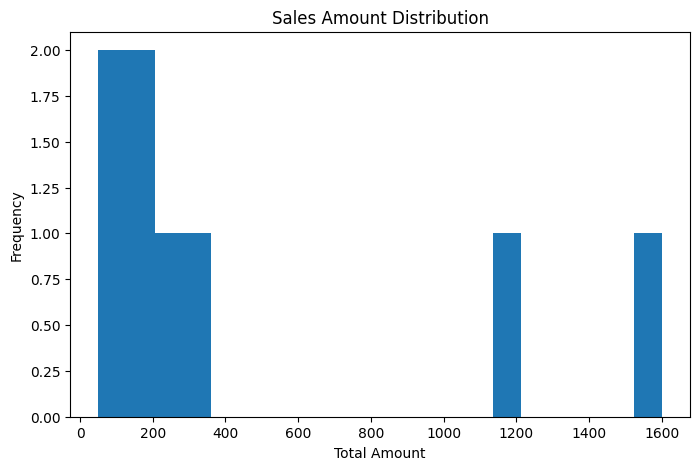

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df['total_amount'], bins=20)
plt.title("Sales Amount Distribution")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()


In [8]:
category_sales = df.groupby("category")['total_amount'].sum()

category_sales


category
Books            50
Clothing         75
Electronics    3250
Home            200
Sports          240
Name: total_amount, dtype: int64

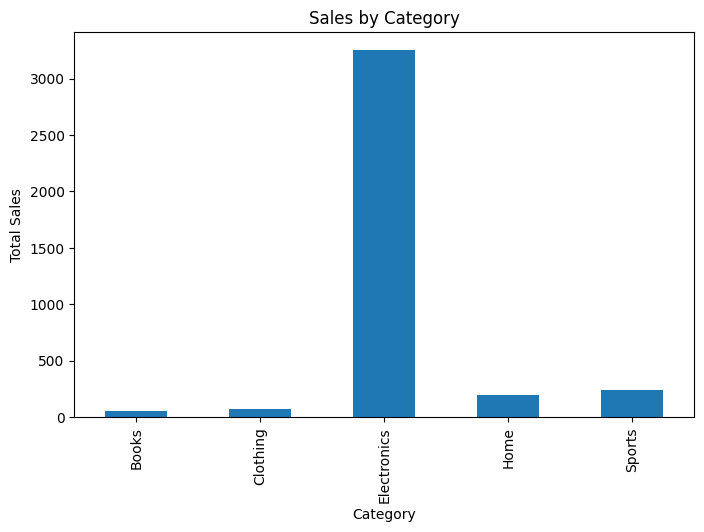

In [9]:
category_sales.plot(kind='bar', figsize=(8,5))
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()
